In [11]:
import rasterio
from skimage.restoration import denoise_tv_bregman
from skimage.segmentation import felzenszwalb
import numpy as np
import matplotlib.pyplot as plt
from srspy import (get_fz_superpixels, 
                   get_superpixel_means_as_features, 
                   get_superpixel_stds_as_features, 
                   get_array_from_features)

In [4]:
with rasterio.open('hv_als.tif') as ds:
    hv_als = ds.read(1)
    
with rasterio.open('hv_srtm.tif') as ds:
    hv_srtm = ds.read(1)

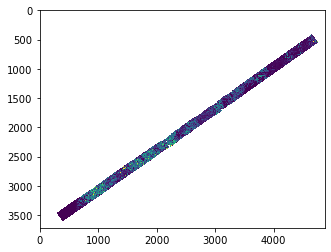

In [5]:
plt.imshow(hv_srtm, vmax=.15)

In [7]:
mask = np.isnan(hv_srtm)
labels = get_fz_superpixels(hv_srtm, mask=mask)

In [12]:
superpixel_means_srtm_f = get_superpixel_means_as_features(labels, hv_srtm)
superpixel_std_srtm_f = get_superpixel_stds_as_features(labels, hv_srtm)

In [13]:
superpixel_means_als_f = get_superpixel_means_as_features(labels, hv_als)
superpixel_std_als_f = get_superpixel_stds_as_features(labels, hv_als)

(array([  1.,  59., 290., 732., 972., 983., 892., 677., 515., 399., 336.,
        275., 212., 170., 161., 119.,  99.,  86.,  95.,  74.,  94.,  68.,
         62.,  53.,  64.,  35.,  44.,  32.,  35.,  27.,  27.,  14.,  16.,
         18.,  14.,  15.,  14.,   7.,   6.,  11.,   4.,   7.,   3.,   8.,
          2.,   5.,   0.,   2.,   3.,   1.,   3.,   2.,   0.,   1.,   0.,
          1.,   4.,   0.,   1.,   3.,   0.,   1.,   2.,   1.,   0.,   0.,
          1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.

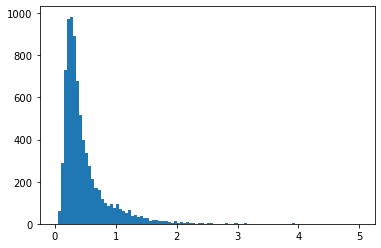

In [16]:
coef_var_srtm = superpixel_std_srtm_f / superpixel_means_srtm_f
data_srtm = coef_var_srtm[~np.isnan(coef_var_srtm)]
plt.hist(data_srtm, range=(0, 5), bins=100)

In [18]:
import scipy.stats

scipy.stats.describe(data_srtm)

DescribeResult(nobs=7872, minmax=(0.032908586539851716, 12.139830956650856), mean=0.48084101797649725, variance=0.18971069331148993, skewness=6.993179656268706, kurtosis=127.7538657601641)

(array([  1.,  47., 107., 267., 522., 840., 930., 881., 758., 599., 527.,
        364., 299., 243., 186., 152., 137., 112., 117.,  81.,  69.,  77.,
         47.,  56.,  52.,  51.,  39.,  30.,  11.,  38.,  23.,  12.,  20.,
         23.,  15.,  12.,   7.,  13.,  13.,   5.,  11.,   5.,   4.,   2.,
          3.,   4.,   4.,   4.,   3.,   1.,   2.,   3.,   4.,   1.,   1.,
          4.,   2.,   2.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,
          2.,   2.,   1.,   1.,   0.,   2.,   1.,   3.,   1.,   2.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.

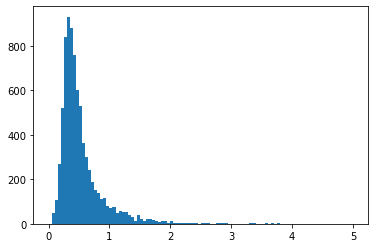

In [21]:
coef_var_als = superpixel_std_als_f / superpixel_means_als_f
data_als = coef_var_als[~np.isnan(coef_var_als)]
plt.hist(data_als, range=(0, 5), bins=100)

In [22]:
import scipy.stats

scipy.stats.describe(data_als)

DescribeResult(nobs=7872, minmax=(0.04560281716871941, 8.240556089397504), mean=0.5339200798710494, variance=0.1668699212959631, skewness=4.391314585973631, kurtosis=40.15056695338147)